In [76]:
import pandas as pd
from time import strptime
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

In [130]:
df_nenana = pd.read_csv('/Users/Berk/Downloads/NenanaIceClassic_1917-2021 - NenanaIceClassic_1917-2021.csv')
df_train = df_nenana[:90]
df_val = df_nenana[90:]

## EDA

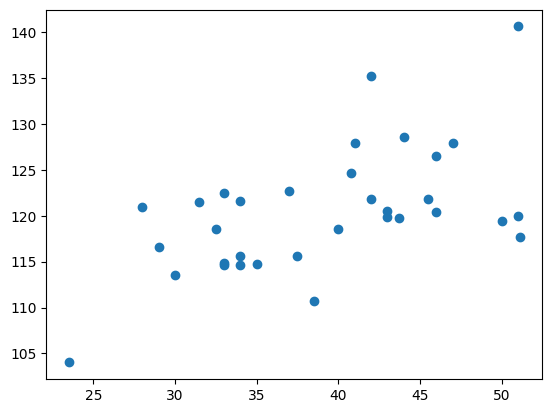

In [131]:
plt.scatter(df_nenana[72:]['Latest Feb Ice Reading'].values, df_nenana[72:]['Decimal Day of Year'].values)

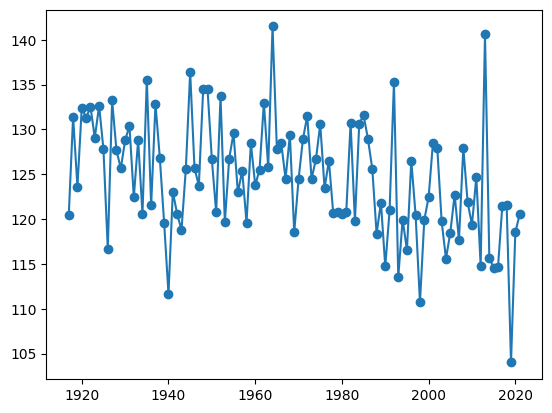

In [133]:
plt.plot(df_nenana['Year'].values, df_nenana['Decimal Day of Year'].values, 'o-')

## ARIMA Models

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95683D+00    |proj g|=  1.10182D-01

At iterate    5    f=  2.88410D+00    |proj g|=  1.12138D-01

At iterate   10    f=  2.87001D+00    |proj g|=  2.16319D-03


 This problem is unconstrained.



At iterate   15    f=  2.86912D+00    |proj g|=  1.69435D-03

At iterate   20    f=  2.86909D+00    |proj g|=  2.60418D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     20     24      1     0     0   2.604D-06   2.869D+00
  F =   2.8690889819702510     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
7.729660433251628


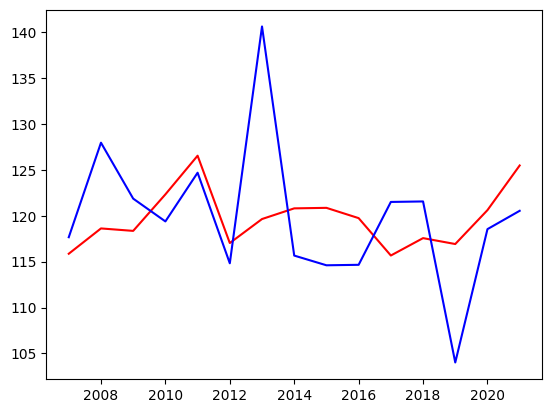

In [75]:
model = SARIMAX(df_train['Decimal Day of Year'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 10))

# Fit the model
results = model.fit()

# # Print the summary
# print(results.summary())

forecast = results.get_forecast(steps=1)

pred_results = results.predict(start=len(df_train)+1, end=len(df_nenana))
rmse = np.sqrt(pred_results.values)

rmse = np.sqrt(np.mean((pred_results.values - df_val['Decimal Day of Year'].values) ** 2))
print(rmse)
plt.plot(df_val['Year'].values, pred_results.values, 'r')
plt.plot(df_val['Year'].values, df_val['Decimal Day of Year'].values, 'b')

/Users/Berk/miniconda3/envs/data-science/lib/python3.9/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7.831720332493405


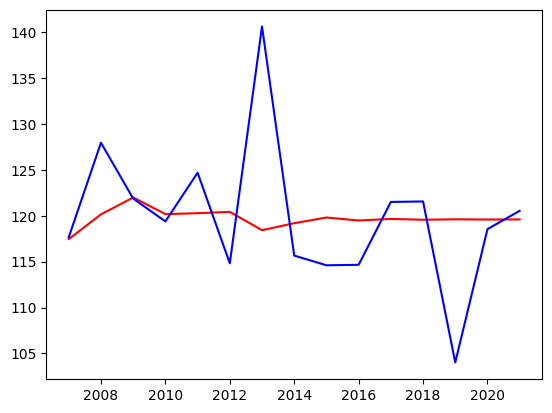

In [78]:
model = ARIMA(df_train['Decimal Day of Year'], order=(1, 1, 10))

# Fit the model
results = model.fit()

# # Print the summary
# print(results.summary())

forecast = results.get_forecast(steps=1)

pred_results = results.predict(start=len(df_train)+1, end=len(df_nenana))
rmse = np.sqrt(pred_results.values)

rmse = np.sqrt(np.mean((pred_results.values - df_val['Decimal Day of Year'].values) ** 2))
print(rmse)
plt.plot(df_val['Year'].values, pred_results.values, 'r')
plt.plot(df_val['Year'].values, df_val['Decimal Day of Year'].values, 'b')

In [ ]:
# Define the ARIMA model with an AR order that indirectly attempts to capture the 5-year cycle
model = ARIMA(df['Melt'], order=(5, 1, 1))  # AR order set to 5, differencing set to 1, MA set to 1

# Fit the model
results = model.fit()

## Scrape wunderground

In [89]:
from bs4 import BeautifulSoup
import requests 

url = 'https://www.wunderground.com/history/monthly/us/ak/fairbanks/PAFA/date/1997-2'
response = requests.get(url)
# Parse the HTML content of the page
soup = BeautifulSoup(response.text, 'html.parser')

In [93]:
header = soup.find(lambda tag: tag.name == "th _ngcontent-app-root-c190" and "Max Temperature" in tag.text)

In [94]:
header

In [ ]:
<tbody _ngcontent-app-root-c190="" class="ng-star-inserted"><tr _ngcontent-app-root-c190="" class="ng-star-inserted"><th _ngcontent-app-root-c190="">Max Temperature</th><td _ngcontent-app-root-c190="" class="ng-star-inserted">55</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">24.71</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">9</td><!----></tr><tr _ngcontent-app-root-c190="" class="ng-star-inserted"><th _ngcontent-app-root-c190="">Avg Temperature</th><td _ngcontent-app-root-c190="" class="ng-star-inserted">29.78</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">13.15</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">-2.32</td><!----></tr><tr _ngcontent-app-root-c190="" class="ng-star-inserted"><th _ngcontent-app-root-c190="">Min Temperature</th><td _ngcontent-app-root-c190="" class="ng-star-inserted">22</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">3.54</td><td _ngcontent-app-root-c190="" class="ng-star-inserted">-12</td><!----></tr><!----></tbody>



In [97]:
!pip install lxml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 13.6 MB/s eta 0:00:00m eta 0:00:010:01:01


In [98]:
from lxml import html

In [104]:
xpath = '//*[@id="inner-content"]/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[1]'
full_xpath= '/html/body/app-root/app-history/one-column-layout/wu-header/sidenav/mat-sidenav-container/mat-sidenav-content/div[2]/section/div[2]/div[1]/div[3]/div[1]/div/lib-city-history-summary/div/div[2]/table/tbody[1]'
<th _ngcontent-app-root-c190="">Max Temperature</th>

In [110]:
response.status_code

200

In [124]:
soup.find_all('th _ngcontent-app-root-c190')

[]

In [127]:
import bs4

In [129]:
bs4.BeautifulSoup(response.text, 'html.parser')

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/Organization" lang="en" prefix="og: http://ogp.me/ns#"><head itemscope="" itemtype="http://schema.org/WebSite">
<meta charset="utf-8"/>
<title>Fairbanks, AK Weather History | Weather Underground</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="//widgets.outbrain.com" rel="dns-prefetch"/>
<link href="//odb.outbrain.com" rel="dns-prefetch"/>
<link href="//c.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//s.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//aax.amazon-adsystem.com" rel="dns-prefetch"/>
<link href="//partner.googleadservices.com" rel="dns-prefetch"/>
<link href="//tpc.googlesyndication.com" rel="dns-prefetch"/>
<link href="//pagead2.googlesyndication.com" rel="dns-prefetch"/>
<link href="//h.nexac.com" rel="dns-prefetch"/>
<link href="//js-sec.indexww.com" rel="dns-prefetch"/>
<link href="//secu

In [119]:
soup = BeautifulSoup(response.text, 'html.parser')
the_word = 'Max Temperature'
tags = soup.find_all('td', text=lambda t: t and the_word in t)

tags

/var/folders/jb/9000pp_j3kxc7dtzkc0f1h0w0000gq/T/ipykernel_23503/438434545.py:3: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  tags = soup.find_all('td', text=lambda t: t and the_word in t)


[]

In [111]:
tree = html.fromstring(response.content)

# Use XPath to find the <tbody> element
# Replace '/path/to/element' with the actual XPath
tbody_elements = tree.xpath(xpath)

In [113]:
tbody_elements

[]

In [ ]:
# Process the <tbody> elements as needed
for tbody in tbody_elements:
    # You can further navigate within each tbody using XPath
    rows = tbody.xpath('./tr')
    for row in rows:
        # Extract data from each cell in the row
        cells = row.xpath('./td')  # Use './th' for header cells
        data = [cell.text.strip() for cell in cells]
        print(data)

## Regression Model

In [164]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [158]:
df_full = df_nenana[72:].reset_index(drop=True)

prior_melt = []
for idx, row in df_full.iterrows():
    if idx == 0:
        continue
    else:
        prior_melt.append(df_full.iloc[idx - 1]['Decimal Day of Year'])
df_full = df_full[1:]
df_full['prior_melt'] = prior_melt

In [161]:
df_train = df_full[:22]
df_val = df_full[22:]

In [162]:
df_train

,Year,Decimal Day of Year,Month,Day,Time,Latest Feb Ice Reading,Latest Feb Date,feb_high_temp,feb_low_temp,feb_avg_temp,prior_melt
1,1990,114.7215,April,24,17:19,35.0,25.0,10.0,0.0,4.52,121.8431
2,1991,121.0028,May,1,12:04,28.0,25.0,35.0,14.0,22.38,114.7215
3,1992,135.2681,May,14,6:26,42.0,24.0,18.0,0.0,11.12,121.0028
4,1993,113.5424,April,23,13:01,30.0,26.0,31.0,13.0,22.92,135.2681
5,1994,119.9590,April,29,23:01,51.0,24.0,36.0,15.0,25.88,113.5424
6,1995,116.5569,April,26,13:22,29.0,28.0,32.0,14.0,21.67,119.9590
7,1996,126.5222,May,5,12:32,46.0,29.0,40.0,26.0,32.00,116.5569
8,1997,120.4361,April,30,10:28,46.0,25.0,55.0,22.0,29.78,126.5222
9,1998,110.7042,April,20,16:54,38.5,25.0,32.0,13.0,16.97,120.4361
10,1999,119.9076,April,29,21:47,43.0,24.0,22.0,1.0,9.25,110.7042


In [248]:
def pred_and_plot(clf, df_val):
    y_pred = clf.predict(df_val[train_columns])

    mse = mean_squared_error(df_val['Decimal Day of Year'].values, y_pred)
    print(mse)
    print(np.mean(abs(df_val['Decimal Day of Year'].values - y_pred)))
    
    plt.plot(df_val['Year'].values, y_pred, 'r')
    plt.plot(df_val['Year'].values, df_val['Decimal Day of Year'].values, 'b')

In [243]:
df_val.columns

Index(['Year', 'Decimal Day of Year', 'Month', 'Day', 'Time',
       'Latest Feb Ice Reading', 'Latest Feb Date', 'feb_high_temp',
       'feb_low_temp', 'feb_avg_temp', 'prior_melt'],
      dtype='object')

54.8264568778644
5.254729459518806


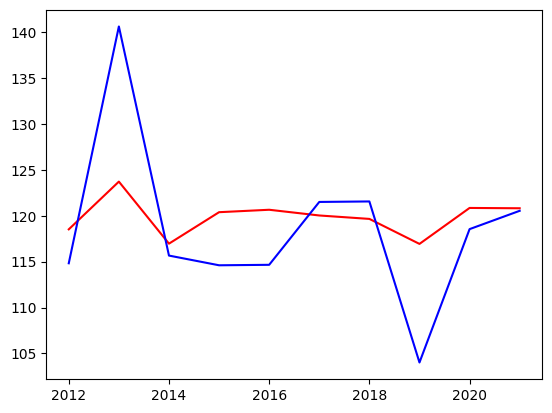

In [249]:
model = LinearRegression()

train_columns = ['Latest Feb Ice Reading', 'feb_low_temp', 'feb_high_temp', 'prior_melt']

model.fit(df_train[train_columns], df_train['Decimal Day of Year'])

pred_and_plot(model, df_val)

54.853379703055154
5.255976564345322


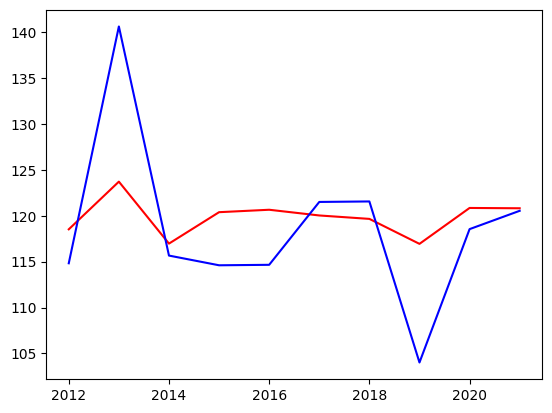

In [250]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)

clf.fit(df_train[train_columns], df_train['Decimal Day of Year'])

pred_and_plot(clf, df_val)

55.403414440120216
5.313481324690683


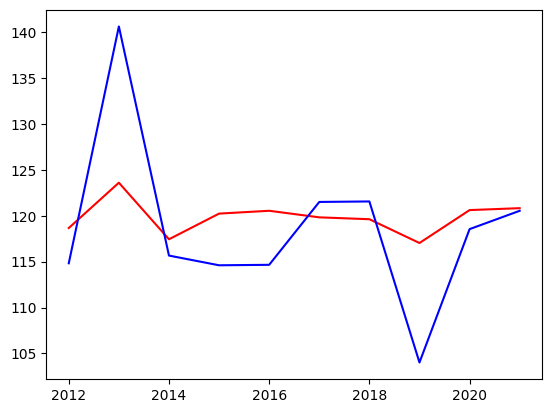

In [251]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.5)

clf.fit(df_train[train_columns], df_train['Decimal Day of Year'])

pred_and_plot(clf, df_val)

86.29761127963278
6.414802199841735


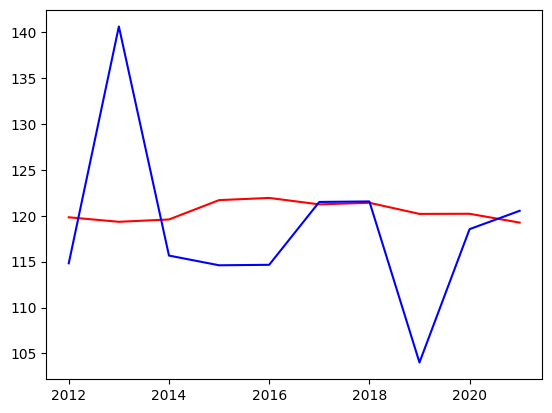

In [252]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

regr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
regr.fit(df_train[train_columns], df_train['Decimal Day of Year'])

pred_and_plot(regr, df_val)

In [275]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(df_train['Decimal Day of Year'])
print(f'ADF Statistic: {adf_test[0]}')
print(f'p-value: {adf_test[1]}')

ADF Statistic: -3.4792666564599584
p-value: 0.008535812186406996


In [276]:
df_train.columns

Index(['Year', 'Decimal Day of Year', 'Month', 'Day', 'Time',
       'Latest Feb Ice Reading', 'Latest Feb Date', 'feb_high_temp',
       'feb_low_temp', 'feb_avg_temp', 'prior_melt'],
      dtype='object')

In [286]:
from statsmodels.tsa.ar_model import AutoReg

train_columns = ['Latest Feb Ice Reading', 'feb_low_temp', 'feb_high_temp', 'prior_melt', 'Latest Feb Date', 'feb_avg_temp']

lag_n = 5
model = AutoReg(endog=df_train['Decimal Day of Year'], lags=lag_n, exog=df_train[train_columns])

model_fit = model.fit()

y_preds = model_fit.predict(start=0, end=len(df_val), exog_oos=df_val[train_columns])

In [292]:
y_preds = model_fit.predict(start=1, end=len(df_val), exog_oos=df_val[train_columns])

In [293]:
len(df_val)

10

In [294]:
len(y_preds)

10

18.0065924045572
3.4969256776768396


Text(0, 0.5, 'Decimal Day of Year')

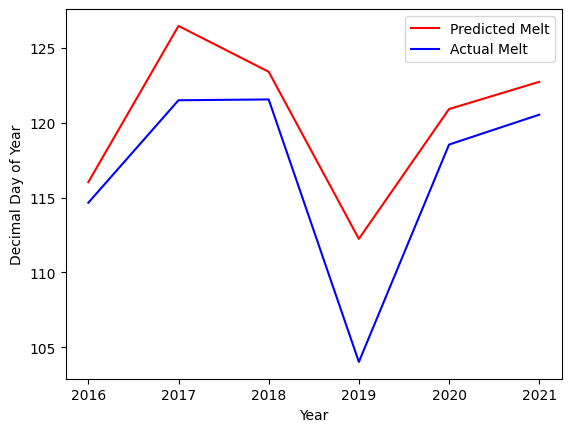

In [295]:
print(mean_squared_error(df_val['Decimal Day of Year'].values[(lag_n-1):], y_preds[lag_n-1:].values))
print(np.mean(abs(df_val['Decimal Day of Year'].values[(lag_n-1):] - y_preds[lag_n-1:].values)))

plt.plot(df_val['Year'].values[(lag_n-1):], y_preds[lag_n-1:].values, 'r')
plt.plot(df_val['Year'].values[(lag_n-1):], df_val['Decimal Day of Year'].values[(lag_n-1):], 'b')
plt.legend(['Predicted Melt', 'Actual Melt'])
plt.xlabel('Year')
plt.ylabel('Decimal Day of Year')

In [285]:
df_nenana

,Year,Decimal Day of Year,Month,Day,Time,Latest Feb Ice Reading,Latest Feb Date,feb_high_temp,feb_low_temp,feb_avg_temp
0,1917,120.4792,April,30,11:30,NaN,NaN,NaN,NaN,NaN
1,1918,131.3979,May,11,9:33,NaN,NaN,NaN,NaN,NaN
2,1919,123.6063,May,3,14:33,NaN,NaN,NaN,NaN,NaN
3,1920,132.4486,May,11,10:46,NaN,NaN,NaN,NaN,NaN
4,1921,131.2792,May,11,6:42,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
100,2017,121.5000,May,1,12:00,31.5,23.0,34.0,29.0,31.36
101,2018,121.5542,May,1,13:18,34.0,25.0,34.0,24.0,26.77
102,2019,104.0146,April,14,0:21,23.5,26.0,31.0,20.0,24.42
103,2020,118.5389,April,27,12:56,32.5,28.0,28.0,10.0,17.97
